<div class="alert alert-block alert-info">
    <h1>Wahrscheinlichkeitstheorie und Statistik</h1>
    <h2>WS 2023 / 2024</h2>
    <h2>WuS Hausaufgabe 4</h2>
    <h3>Abgabetermin</h3>
    <p>Die Abgabefrist dieser Hausaufgabe ist <strong>2023-12-04 12:00 (Montag Mittag)</strong>!</p>
    <p>Vergessen Sie nicht Ihre Übung abzugeben (<a href="../../tree#assignments">Assignment Tab / Submit Button</a>). Einfaches Speichern reicht nicht! Sie können beliebig oft abgeben, die letzte Abgabe vor der Deadline wird gewertet.</p>
    <h2>Viel Erfolg!</h2>
</div>

<div class="alert alert-block alert-warning">
    <h2>Hinweise zur Bearbeitung der Übung</h2>
    <h3>Allgemeine Informationen:</h3>
    <ul>
        <li>Schreiben Sie Ihre Antwort an die Stelle <b>YOUR CODE HERE</b>.</li>
        <li>Fügen Sie <b>keine</b> neuen Zellen hinzu oder löschen Zellen.</li>
        <li>Benennen Sie <b>keine</b> der Dateien / Notebooks um.</li>
    </ul>
    <h3>Angabe von Ergebnissen</h3>
    <ul>
        <li>Runden Sie Ihre Ergebnisse nicht. Bei den Tests werden bis zu 6 Nachkommastellen geprüft.</li>
        <li>Prozentzahlen werden immer als Zahl zwischen 0 und 1 angegeben. 30% wird somit als 0.3 angegeben.</li>
        <li>Fließkommazahlen werden mit einem Dezimalpunkt angegeben, nicht mit einem Komma. $\frac{1}{4} \rightarrow 0.25$.</li>
    </ul>
    <h3>Programmcode</h3>
    <ul>
        <li>Das Ergebnis einer Funktion muss mittels <b>return</b> zurückgegeben werden. Ein <b>print</b> Statement ist keine gültige Rückgabe.</li>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart &amp; Run All (oder den <i class="fa-forward fa"></i> Button in der Toolbar). Damit führen Sie das Notebook linear von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die <b>raise NotImplementedError()</b>, wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst, die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
    </ul>
</div>

In [35]:
# execute this for default imports
import math
import random as rd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

# Task 1

**[10 Point(s)]**

## Impfungen 

50 Säuglinge erhalten eine bestimmte Impfung. Die Wahrscheinlichkeit, dass ein Säugling die Impfung nicht verträgt, ist $p = 0.05$. Die Reaktionen der einzelnen Säuglinge auf die Impfung sind unabhängig voneinander. Sei $X$ = Anzahl der Säuglinge, die die Impfung nicht vertragen.

Berechnen Sie $P(X=0), P(X=1), P(X=2)$ und $P(X\geq3)$.

## Task 1.1

**[5 Point(s)]**

### Impfungen a) 

Berechnen Sie die Wahrscheinlichkeiten approximativ.

Speichern Sie Ihre Lösung in den Variablen ```P0, P1, P2, Pg3```.

In [36]:
lambda_= .5 * 50

P0 = stats.poisson.pmf(0, lambda_)
P1 = stats.poisson.pmf(1, lambda_)
P2 = stats.poisson.pmf(2, lambda_)
Pg3 = 1 - P0 - P1 - P2

P0, P1, P2, Pg3

(1.3887943864964021e-11,
 3.471985966241e-10,
 4.33998245780125e-09,
 0.999999995298931)

## Task 1.2

**[5 Point(s)]**

### Impfungen b) 

Berechnen Sie die Wahrscheinlichkeiten genau.

Speichern Sie Ihre Lösung in den Variablen ```P0genau, P1genau, P2genau, Pg3genau```.

In [37]:
from scipy.stats import binom
def genau(k: int, n: int, p: float):
    return math.comb(n, k) * p**k * (1 - p)**(n-k)

n = 50
p = .5
P0genau = genau(0, n=n, p=p)
# P0genau = binom.pmf(0, n=n, p=p)
P1genau = genau(1, n=n, p=p)
P2genau = genau(2, n=n, p=p)
Pg3genau = 1- P0genau - P1genau - P2genau

P0genau, P1genau, P2genau, Pg3genau

(8.881784197001252e-16,
 4.440892098500626e-14,
 1.0880185641326534e-12,
 0.9999999999988667)

# Task 2

**[15 Point(s)]**

## Werkstücke

Um zu entscheiden, ob eine Lieferung von 100 Werkstücken angenommen werden soll, wird folgender Stichprobenplan durchgeführt:


5 Werkstücke werden zufällig entnommen. Falls sich darunter kein Ausschussstück befindet, wird die Lieferung angenommen. 

Ist mehr als ein Ausschussstück darunter, wird die Lieferung abgelehnt. 

Ist genau ein Ausschussstück darunter, dann wird eine zweite Stichprobe im Umfang von 10 entnommen. Falls sich kein Ausschussstück in dieser Stichprobe befindet, wird die Lieferung angenommen, andernfalls endgültig abgelehnt. 

## Task 2.1

**[6 Point(s)]**

### Werkstücke a)

Das Ziel ist es nun die Wahrscheinlichkeit für die Annahme der Lieferung zu berechnen, wenn die gesamte Lieferung 4 defekte Werkstücke enthält und die entnommenen Werkstücke nach der Überprüfung nicht zurückgelegt werden.
Berechnen Sie dazu zunächst die Wahrscheinlichkeit für 0 defekte Teile in der 1. Stichprobe.

Speichern Sie Ihre Lösung in der Variablen ```p0InEinsDefekt```.

In [38]:
def kIn5(k:int):
    return (math.comb(4,k)*math.comb(100-4,5-k))/math.comb(100,5)

def kIn10(k:int):
    return (math.comb(3,k)*math.comb(95-3,10-k))/math.comb(95,10)

# p0InEinsDefekt=kIn5(k=0)
p0InEinsDefekt=stats.hypergeom.pmf(0,100,4,5)
p0InEinsDefekt 

0.8118751155570009

## Task 2.2

**[6 Point(s)]**

### Werkstücke b)

Berechnen Sie nun die Wahrscheinlichkeit für genau 1 defektes Teil in der ersten Stichprobe und 0 defekte Teile in der zweiten Stichprobe.

Speichern Sie Ihre Lösung in der Variablen ```p1InEinsUnd0InZweiDefekt```.

In [39]:
# p1InEinsUnd0InZweiDefekt=kIn5(k=1)*kIn10(k=0)
p1InEinsUnd0InZweiDefekt=stats.hypergeom.pmf(1,100,4,5)*stats.hypergeom.pmf(0,95,3,10)
p1InEinsUnd0InZweiDefekt

0.12594278573660017

## Task 2.3

**[3 Point(s)]**

### Werkstücke c)

Berechnen Sie die Wahrscheinlichkeit für die Annahme der Lieferung.

Speichern Sie Ihre Lösung in der Variablen ```pAnnahmeA```.

In [40]:
# pAnnahmeA=1 - kIn5(k=5) - kIn5(k=4) - kIn5(k=3) - kIn5(k=2) - kIn5(k=1)*(kIn10(k=1) + kIn10(k=2) + kIn10(k=3))
pAnnahmeA = p0InEinsDefekt + p1InEinsUnd0InZweiDefekt
pAnnahmeA

0.937817901293601

# Task 3

**[35 Point(s)]**

## Rechenaufgaben
Sei X normalverteilt mit Mittelwert 5 und Standardabweichung 7.


## Task 3.1

**[5 Point(s)]**

### Rechenaufgaben a)
Wie wahrscheinlich ist es, dass X kleiner als 5 ist?

Speichern Sie ihre Lösung in der Variable ```p_k_5```.

In [41]:
from scipy.stats import norm

mu=5
sigma=7
x_a=5

z=(x_a-mu)/sigma

# norm.cdf((x-mu)/sigma) -> sodass mean = 0 und std_dev = 1
p_k_5 = norm.cdf(z)

p_k_5

0.5

## Task 3.2

**[5 Point(s)]**

### Rechenaufgaben b)
Wie wahrscheinlich ist es, dass X größer als 4 und kleiner als 6 ist?

Speichern Sie ihre Lösung in der Variable ```p_4_6```.

In [42]:
x_b1=4
x_b2=6
# norm.cdf(x (sodass X <= x, loc=mean, scale=std_dev)
p_4_6 = norm.cdf(x_b2, mu, sigma) - norm.cdf(x_b1, mu, sigma)

p_4_6

0.1135969936329364

## Task 3.3

**[3 Point(s)]**

### Rechenaufgaben c)
Wie wahrscheinlich ist es, dass X größer als 12 ist?

Speichern Sie ihre Lösung in der Variable ```p_g_12```.

In [43]:
x_c=12
p_g_12 = 1 - norm.cdf(x_c, mu, sigma)

p_g_12

0.15865525393145707

## Task 3.4

**[4 Point(s)]**

### Rechenaufgaben d)
Wie wahrscheinlich ist es, dass X kleiner als 4 oder größer als 6 ist?

Speichern Sie ihre Lösung in der Variable ```p_6_4```.

In [44]:
p_6_4 = 1 - p_4_6 - norm.pdf(x_b2, mu, sigma)

p_6_4

0.8299898435198835

## Task 3.5

**[3 Point(s)]**

### Rechenaufgaben e)
Wie wahrscheinlich ist es, dass X = 5 ist?

Speichern Sie ihre Lösung in der Variable ```p_5```.

In [45]:
p_5 = norm.pdf(5, mu, sigma)

p_5

0.056991754343061814

## Task 3.6

**[5 Point(s)]**

### Sei nun für die folgenden Teilaufgaben $X \sim \chi^2_3 = X_1^2 + X_2^2 + X_3^2$ und $X_1, X_2, X_3$ unabhängige standardnormalverteilte Zufallsvariablen.


### Rechenaufgabe f)
Berechnen Sie $F_X(5)$.

Speichern Sie ihre Lösung in ```p_chi_5```.

In [46]:
from scipy.stats import chi2
# Degree of Freedom for the Chi-Quadrat-Verteilung
dof=3

# Possibility, that X <= 5
p_chi_5 = chi2.cdf(5, ddof)
p_chi_5

0.8282028557032665

## Task 3.7

**[5 Point(s)]**

### Rechenaufgabe g)

Berechnen Sie $P(2 \leq X < 4)$.

Speichern Sie ihre Lösung in ```p_chi_2_4```.

In [47]:
# Same as above (also CDF)
p_chi_2_4 = chi2.cdf(4, dof) - chi2.cdf(2, dof)

p_chi_2_4

0.3109425745217686

## Task 3.8

**[5 Point(s)]**

### Rechenaufgabe h)

Berechnen Sie $\int_2^5 f_X(u) du$.

Speichern Sie ihre Lösung in ```p_chi_2_5```.

In [48]:
p_chi_2_5 = chi2.cdf(5, dof) - chi2.cdf(2, dof)
p_chi_2_5

0.40060956017414623

# Task 4

**[20 Point(s)]**

## Transformationen


## Task 4.1

**[5 Point(s)]**

### Transformationen a)
Unter ```data/data.csv``` finden Sie einen Datensatz. Dieser enthält Messungen der Mengen in g an Müsli, die beim Einschütten aus der Packung in eine Schüssel auftraten.

Laden Sie den Datensatz aus der Datei und speichern sie ihn in der Variable ```data```.
Sie können diese danach Plotten, um sich einen Überblick über die Daten zu verschaffen.

<function matplotlib.pyplot.show(close=None, block=None)>

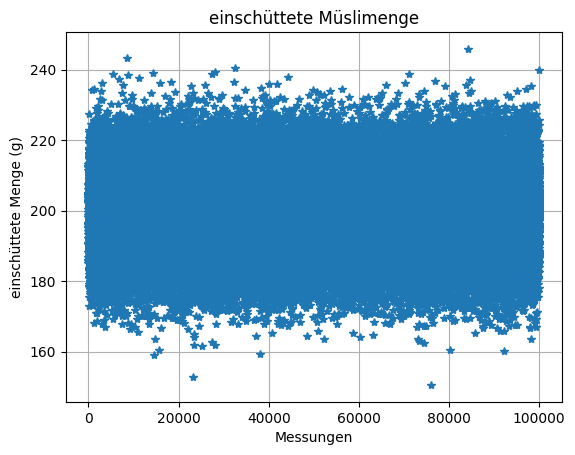

In [64]:
# Read .csv file
data = pd.read_csv("WuS_Hausaufgabe_4_files/data/data.csv", header=None)

# Plot 
plt.plot(data, marker='*', linestyle='')
plt.title('einschüttete Müslimenge')
plt.xlabel('Messungen')
plt.ylabel('einschüttete Menge (g)')
plt.grid(True)
plt.show

## Task 4.2

**[3 Point(s)]**

### Transformationen b)
Um diese Normalverteilung mit anderen vergleichbar zu machen und das Rechnen zu erleichtern, soll sie in eine Standardnormalverteilung transformiert werden.

Berechnen Sie dazu zunächst den Mittelwert und die Standardabweichung der Daten und speichern diese in ```mu``` und ```sigma```.

Gehen Sie davon aus, dass der Datensatz keine Stichprobe, sondern die Grundgesamtheit repräsentiert.

In [69]:
# mu = mean
mu = np.mean(data)
# sigma = standard deviation
sigma = np.std(data)[0]

mu, sigma

(199.93070630416864, 9.999170641123184)

## Task 4.3

**[4 Point(s)]**

### Transformationen c)
Wenden Sie nun Transformationen auf die Daten an, damit diese standardnormalverteilt sind.

Speichern Sie die Transformierten Daten in ```data_std_norm```.

In [68]:
data_std_norm = (data-mu)/sigma

data_std_norm 

,0
0,-0.762800
1,0.520028
2,-0.457945
3,1.163734
4,0.269084
...,...
99995,-0.525051
99996,1.212765
99997,-0.264044
99998,-0.004573


## Task 4.4

**[2 Point(s)]**

### Transformationen d)

Gegeben sei eine Normalverteilung mit Mittelwert = 5 und Varianz = 7.
Nun wird die Transformation $f(x) = 7 x-5$ angewendet. 
Was ist der resultierende Mittelwert der Verteilung?

- 0
- 30
- 35
- 44
- keiner der Obigen

In [ ]:
# f(x) = ax + b
# -> new_mean = a*old_mean + b, new_var = a²*old_var

## Task 4.5

**[2 Point(s)]**

Was ist die resultierende Varianz?

- 1
- 14
- 44
- 49
- 343
- 2401
- keine der Obigen

## Task 4.6

**[2 Point(s)]**

Gegeben sei eine Normalverteilung mit Mittelwert = 1 und Varianz = 1.
Nun wird die Transformation $f(x) = 3x^2 +1$ angewendet. 
Was ist der resultierende Mittelwert der Verteilung? 

- 1
- 3
- 4
- 10
- keiner der Obigen

## Task 4.7

**[2 Point(s)]**

Was ist die resultierende Varianz? 

- 1
- 3
- 4
- 10
- keiner der Obigen

# Task 5

**[20 Point(s)]**


## Füllmenge eines Kölschglases 

Nehmen Sie an ein Wirt befüllt handelsübliche Kölschgläser mit durchschnittlich $\mu=$200ml und einer Standardabweichung von $\sigma=$10ml. Gehen Sie davon aus, dass die Füllmenge normalverteilt ist.  


## Task 5.1

**[5 Point(s)]**

### Füllmenge eines Kölschglases a)

Wie wahrscheinlich ist es, dass das Glas überläuft, wenn das Glas maximal 220ml fasst? 

Speichern Sie Ihre Lösung in der Variablen ```pUeberlauf```.

In [71]:
mu = 200
sigma = 10

# norm.cdf(x, loc=mean, scale=std_dev) : Probability that a glass
# is filled to less than or equal (<=) 220ml
pUeberlauf=1 - norm.cdf(220, loc=mu, scale=sigma)
pUeberlauf

0.02275013194817921

## Task 5.2

**[5 Point(s)]**

### Füllmenge eines Kölschglases b)

Welche Füllmenge wird in 85% der Fälle nicht überschritten?

Speichern Sie Ihre Lösung in der Variablen ```q85Prozent```.

In [73]:
# norm.ppf(%, loc=mean, scale=std_dev) : calculate z Score for 85%
# percentile
q85Prozent=norm.ppf(.85, loc=mu, scale=sigma)
q85Prozent

210.3643338949379

## Task 5.3

**[5 Point(s)]**

### Füllmenge eines Kölschglases c) 

Wie wahrscheinlich ist es, dass ein Glas exakt 200ml enthält?

Speichern Sie Ihre Lösung in der Variablen ```pGenau200ml```.

In [74]:
pGenau200ml=norm.pdf(200, loc=mu, scale=sigma)

pGenau200ml

0.03989422804014327

## Task 5.4

**[5 Point(s)]**

### Füllmenge eines Kölschglases d) 

Wie müsste sich die mittlere Füllmenge verändern, damit es nur in einem Prozent der Fälle zum Überlaufen kommt?

Hier sind einige Hinweise, die Ihnen dabei helfen könnten:
- Für welchen Parameter steht die mittlere Füllmenge?
- Denken Sie darüber nach, ob sich die Standardabweichung ändert
- Schauen Sie in der Vorlesung nach, wie sich eine Normalverteilung verändert, wenn der Erwartungswert sich ändert
- Schreiben Sie die Wahrscheinlichkeit die Sie berechnen müssen auf: $P(X ...) = ...$

Speichern Sie Ihre Lösung in der Variablen ```myNeu```.

In [76]:
myNeu=norm.ppf(.01, loc=220, scale=sigma)
myNeu

196.7365212595916

### Viel Erfolg

<div class="alert alert-block alert-warning">
    <h3>Erinnerungen: Ausführbar? Errors Raised? Abgegeben?</h3>
    <ul>
        <li>Stellen Sie sicher, dass sich Ihr Code ausführen lässt. Code der nicht läuft kann nicht automatisch bewertet werden.</li>
        <li><strong>Bevor Sie abgeben:</strong> Klicken Sie im Menü auf Kernel > Restart &amp; Run All (oder den <i class="fa-forward fa"></i> Button in der Toolbar). Damit führen Sie das Notebook linear von oben nach unten aus. Alle Fehler die dann auftreten, treten auch beim Bewerten auf.</li>
        <li>Entfernen Sie die <b>raise NotImplementedError()</b>, wenn Sie eine Aufgabe bearbeiten. Ansonsten wird beim Bewerten eine Exception ausgelöst, die uns sagt, dass Sie die Aufgabe nicht bearbeitet haben!</li>
        <li>Vergessen Sie nicht Ihr bearbeitetes Notebook zu <strong>abzugeben (<a href="../../tree#assignments">Assignment Tab / Submit Button</a>)</strong>! Einfaches Speichern reicht nicht und wird nicht bewertet.</li>
    </ul>
</div>


<div class="alert alert-block alert-danger">
    Timestamp:
    <h1>2023-11-30 23:52:21.670362 CET</h1>
</div>
